# Distribution of $s$ Errors

## Querying the Microlensing Table from Exoplanet Archive

In [2]:
# Import required libraries
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [12]:
query = NasaExoplanetArchive.query_criteria(table="ML", select="pl_name,htmllink,ml_modeldef,ml_sepinsnorp,ml_sepinsnorperr1,ml_sepinsnorperr2,ml_description,ml_modelchisq")
ML_df = query.to_pandas()

# Filter out rows with missing values
#exoplanet_df_clean = ML_df.dropna(subset=['pl_bmassj', 'pl_orbsmax']).copy()

ML_df["fractional_uncertainty"] = np.sqrt(ML_df["ml_sepinsnorperr1"]**2 + ML_df["ml_sepinsnorperr2"]**2) / ML_df["ml_sepinsnorp"]
ML_df["weights"] = -(1/2) * ML_df["ml_modelchisq"]
ML_df["prob"] = np.abs(ML_df["weights"] / (ML_df["weights"].sum()))

ML_df.head()


,pl_name,htmllink,ml_modeldef,ml_sepinsnorp,ml_sepinsnorperr1,ml_sepinsnorperr2,ml_description,ml_modelchisq,fractional_uncertainty,weights,prob
0,KMT-2022-BLG-1790L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,0.9755,0.0070,-0.0070,Outer (default),5716.4,0.010148,-2858.20,0.001317
1,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.5400,0.0410,-0.0410,Inner (default),665.8,0.037651,-332.90,0.000153
2,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,1,1.1423,0.0078,-0.0078,Inner (default),2373.3,0.009657,-1186.65,0.000547
3,KMT-2017-BLG-2197L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.7230,0.0170,-0.0170,Outer,666.0,0.033253,-333.00,0.000153
4,KMT-2022-BLG-2076L b,<a refstr=HAN_ET_AL__2025 href=https://ui.adsa...,0,0.8946,0.0065,-0.0065,Outer,2374.0,0.010275,-1187.00,0.000547


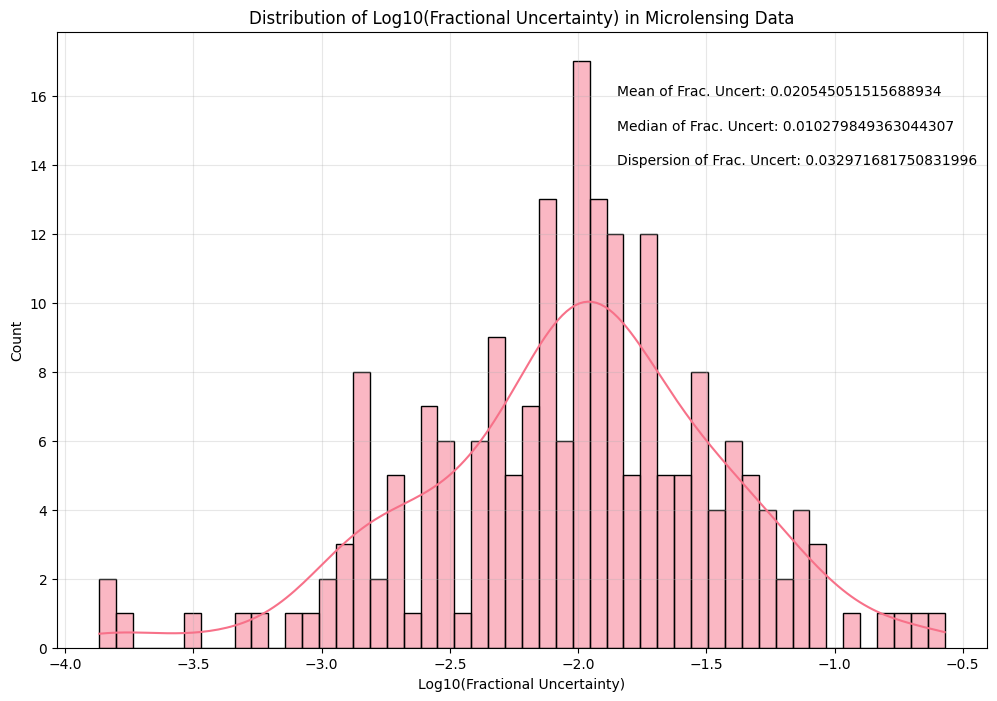

In [29]:
# Alternative with log-transformed data
plt.figure(figsize=(12, 8))
sns.histplot(data=np.log10(ML_df['fractional_uncertainty'][ML_df["ml_modeldef"] == 1]), bins=50, kde=True)
plt.xlabel('Log10(Fractional Uncertainty)')
plt.ylabel('Count')
plt.title('Distribution of Log10(Fractional Uncertainty) in Microlensing Data')
plt.text(-1.85, 16, s = f"Mean of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1].mean()}")
plt.text(-1.85, 15, s = f"Median of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1].median()}")
plt.text(-1.85, 14, s = f"Dispersion of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["ml_modeldef"] == 1].std()}")
plt.grid(True, alpha=0.3)
plt.show()

**For a not quick and dirty version:**
* make a new column for the weights
* make sure the sum of the weights for each planet add up to 1
* calculate the relative weights using chi2
   - L_i = -1/2 * chi^2
   - P_i = L_i/sum(L)
* weight the histogram by these probabilities

> Note: we can ignore the fact that some of the degenerate models might not be single lenses, because they are included in our probability calculations but they won't have and s to get included in the histogram.

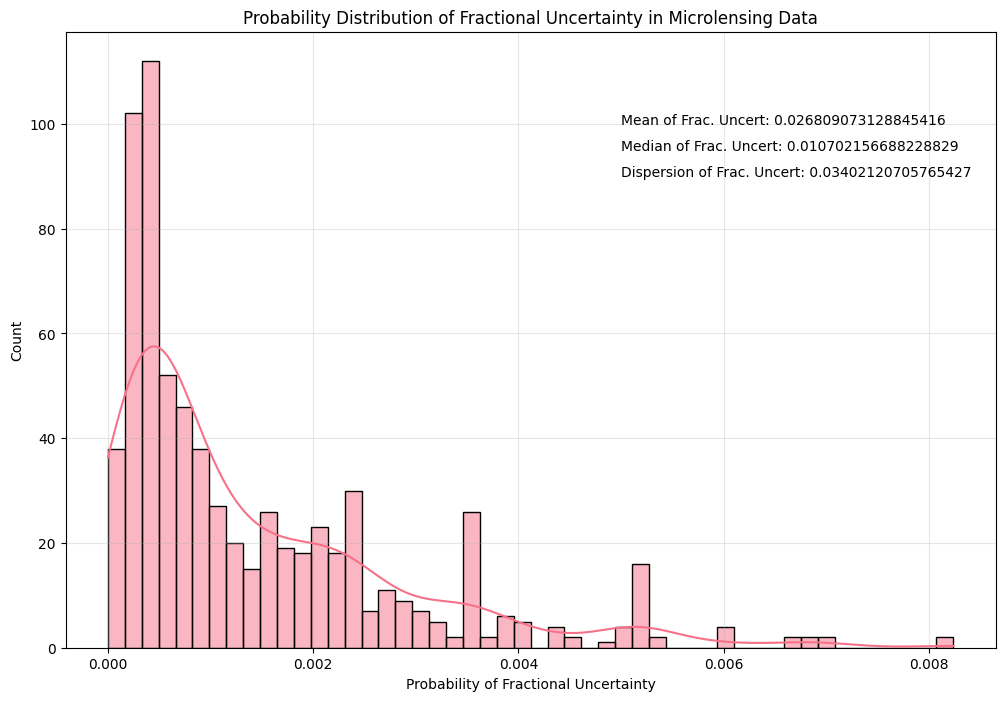

In [36]:
# Alternative with log-transformed data
plt.figure(figsize=(12, 8))
sns.histplot(data=(ML_df['prob']), bins=50, kde=True)
plt.xlabel('Probability of Fractional Uncertainty')
plt.ylabel('Count')
plt.title('Probability Distribution of Fractional Uncertainty in Microlensing Data')
plt.grid(True, alpha=0.3)
plt.text(0.005, 100, s = f"Mean of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["prob"].isna()].mean()}")
plt.text(0.005, 95, s = f"Median of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["prob"].isna()].median()}")
plt.text(0.005, 90, s = f"Dispersion of Frac. Uncert: {ML_df["fractional_uncertainty"][ML_df["prob"].isna()].std()}")
plt.show()